
<img src="../../img/ods_stickers.jpg">

## <center> [mlcourse.ai](https://mlcourse.ai) – открытый курс OpenDataScience по машинному обучению
    
Автор материала: Екатерина Демидова, Data Scientist @ Segmento. Материал распространяется на условиях лицензии [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала.
Автор материала:

# <center>Домашнее задание № 2 (демо). <br> Визуальный анализ данных о публикациях на Хабрахабре</center>

**Заполните код в клетках и ответьте на вопросы в [веб-форме](https://docs.google.com/forms/d/1y8qj5iYpaVhczjWnZuHd5NRR_sdCGy3eTF5n-qPKknQ).**

In [1]:
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

## Загрузка и знакомство с данными

Для работы вам понадобятся предобработанные данные нашего учебного конкурса на kaggle [«Прогноз популярности статьи на Хабре»](https://www.kaggle.com/c/howpop-habrahabr-favs). Скачайте [данные](https://drive.google.com/file/d/1nV2qV9otN3LnVSDqy95hvpJdb6aWtATk/view?usp=sharing) соревнования (данные были удалены с Kaggle ради организации последующего идентичного соревнования, так что тут ссылка на Google Drive).

In [2]:
# при необходимости поменяйте путь к данным
# df = pd.read_csv("../../data/howpop_train.csv")
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab/mlcourse_ai_russian/topic02_visual_analysis/howpop_train.csv')

In [4]:
df.shape

(134137, 17)

In [5]:
df.head(3).T

,0,1,2
url,https://habrahabr.ru/post/18284/,https://habrahabr.ru/post/18285/,https://habrahabr.ru/post/18286/
domain,habrahabr.ru,habrahabr.ru,habrahabr.ru
post_id,18284,18285,18286
published,2008-01-01 18:19:00,2008-01-01 18:30:00,2008-01-01 18:34:00
author,@Tapac,@DezmASter,@DezmASter
flow,develop,design,design
polling,False,False,False
content_len,4305,7344,8431
title,Новогодний подарок блоггерам — WordPress 2.3.2,"Сумасшедшие яйца, или сервис для отслеживания ...","Сумасшедшие яйца, или сервис для отслеживания ..."
comments,0,1,47


Избавимся сразу от переменных, названия которых заканчиваются на `_lognorm` (нужны для соревнования на Kaggle). Выберем их с помощью `filter()` и удалим `drop`-ом:

In [6]:
df.drop(
    filter(lambda c: c.endswith("_lognorm"), df.columns),
    axis=1,  # axis = 1: столбцы
    inplace=True,
)  # избавляет от необходимости сохранять датасет

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
post_id,134137.0,181307.054265,81766.350702,18284.0,115565.0,182666.0,257401.0,314088.0
content_len,134137.0,7516.929699,8724.771640,1.0,2179.0,4949.0,9858.0,352471.0
comments,134137.0,39.625994,62.398958,0.0,7.0,19.0,48.0,2266.0
favs,134137.0,71.999866,145.854135,0.0,8.0,27.0,78.0,8718.0
views,134137.0,16631.013084,31479.819691,3.0,2100.0,7600.0,18700.0,1730000.0
votes_plus,133566.0,35.536888,42.461073,0.0,11.0,22.0,45.0,1466.0
votes_minus,133566.0,8.050035,11.398282,0.0,2.0,5.0,10.0,445.0


In [8]:
df.describe(include=["object", "bool"]).T  # бинарные и категориальные переменные

,count,unique,top,freq
url,134137,134137,https://habrahabr.ru/post/18284/,1
domain,134137,2,habrahabr.ru,97048
published,134137,130291,2011-06-14 15:52:00,39
author,97657,22077,@alizar,5292
flow,97048,6,develop,53318
polling,134137,2,False,129412
title,134137,133628,"Интересные события, произошедшие в выходные",56


In [9]:
# настройка внешнего вида графиков в seaborn
sns.set_style("dark")
sns.set_palette("RdBu")
sns.set_context(
    "notebook", font_scale=1.5, rc={"figure.figsize": (15, 5), "axes.titlesize": 18}
)

Столбец **`published`** (время публикации) содержит строки. Чтобы мы могли работать с этими данными как с датой/временем публикации, приведём их к типу `datetime`:

In [10]:
print(df.published.dtype)
df["published"] = pd.to_datetime(df.published, yearfirst=True)
print(df.published.dtype)

object
datetime64[ns]


Создадим несколько столбцов на основе данных о времени публикации:

In [12]:
df["year"] = [d.year for d in df.published]
df["month"] = [d.month for d in df.published]

df["dayofweek"] = [d.isoweekday() for d in df.published]
df["hour"] = [d.hour for d in df.published]

df

,url,domain,post_id,published,author,flow,polling,content_len,title,comments,favs,views,votes_plus,votes_minus,year,month,dayofweek,hour
0,https://habrahabr.ru/post/18284/,habrahabr.ru,18284,2008-01-01 18:19:00,@Tapac,develop,False,4305,Новогодний подарок блоггерам — WordPress 2.3.2,0,0,236,0.0,0.0,2008,1,2,18
1,https://habrahabr.ru/post/18285/,habrahabr.ru,18285,2008-01-01 18:30:00,@DezmASter,design,False,7344,"Сумасшедшие яйца, или сервис для отслеживания ...",1,1,353,1.0,0.0,2008,1,2,18
2,https://habrahabr.ru/post/18286/,habrahabr.ru,18286,2008-01-01 18:34:00,@DezmASter,design,False,8431,"Сумасшедшие яйца, или сервис для отслеживания ...",47,72,1200,45.0,5.0,2008,1,2,18
3,https://habrahabr.ru/post/18291/,habrahabr.ru,18291,2008-01-02 01:32:00,@Taoorus,design,False,5662,"Сглаживание шрифтов, и субпиксельная отрисовка",102,36,5700,72.0,3.0,2008,1,3,1
4,https://geektimes.ru/post/18294/,geektimes.ru,18294,2008-01-02 14:34:00,@dennydo,NaN,False,3706,Почему мне не нравится iPhone,230,6,1400,73.0,15.0,2008,1,3,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134132,https://habrahabr.ru/company/mailru/blog/314014/,habrahabr.ru,314014,2016-10-31 21:45:00,NaN,develop,False,56033,Парсинг JSON — это минное поле,58,347,35500,164.0,6.0,2016,10,1,21
134133,https://geektimes.ru/post/282086/,geektimes.ru,282086,2016-10-31 22:44:00,@marks,NaN,False,5504,Заработала система раннего предупреждения НАСА...,52,16,12900,22.0,0.0,2016,10,1,22
134134,https://geektimes.ru/post/282090/,geektimes.ru,282090,2016-10-31 23:26:00,@Shapelez,NaN,False,2883,Арзамасский городской суд постановил заблокиро...,16,14,15800,28.0,4.0,2016,10,1,23
134135,https://geektimes.ru/post/282092/,geektimes.ru,282092,2016-10-31 23:52:00,@ragequit,NaN,False,5735,Медиа-коммуникационный союз планирует внести в...,47,14,15000,20.0,0.0,2016,10,1,23


-----
Теперь Ваша очередь. В каждом пункте предлагается построить картинку и с ее помощью ответить на вопрос в [форме](https://docs.google.com/forms/d/e/1FAIpQLSf3b5OG8zX_nLQBQ-t20c6M5Auz-VUL-yxj8Fm9_o_XWDBTrg/viewform?c=0&w=1). Конечно, можно попытаться ответить на все вопросы только с Pandas, без картинок, но мы советуем Вам потренироваться строить (красивые) визуализации.   

## 1\. В каком месяце (и какого года) было больше всего публикаций?

* март 2016
* март 2015
* апрель 2015
* апрель 2016

<Axes: xlabel='year', ylabel='count'>

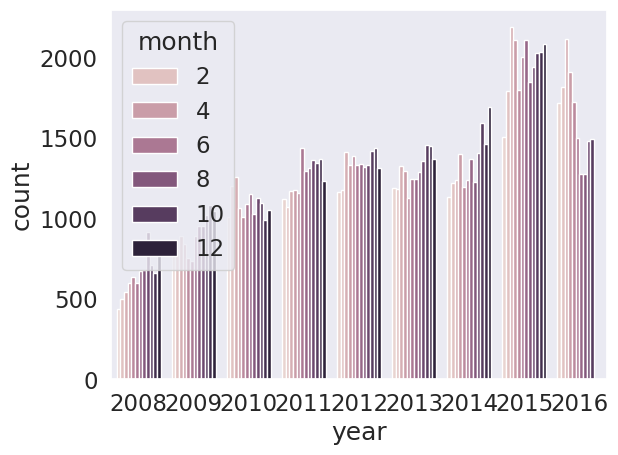

In [42]:
sns.countplot(df, x='year', hue='month')

## 2\. Проанализируйте публикации в месяце из предыдущего вопроса

Выберите один или несколько вариантов:

* Один или несколько дней сильно выделяются из общей картины
* На хабре _всегда_ больше статей, чем на гиктаймсе
* По субботам на гиктаймс и на хабрахабр публикуют примерно одинаковое число статей

Подсказки: постройте график зависимости числа публикаций от дня; используйте параметр `hue`; не заморачивайтесь сильно с ответами и не ищите скрытого смысла :)

<Axes: xlabel='dayofweek', ylabel='count'>

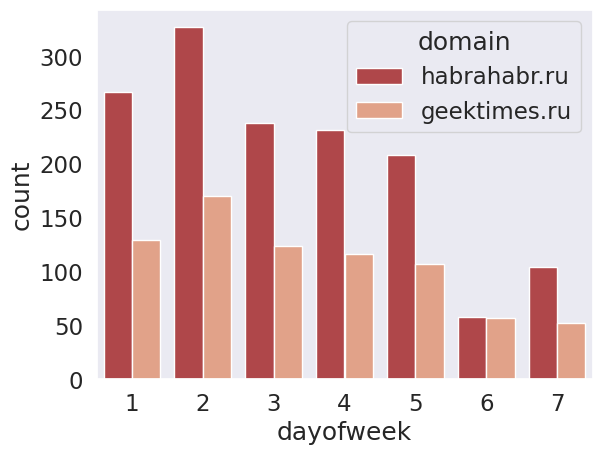

In [46]:
interesting_year_month = df[(df['year'] == 2015) & (df['month'] == 3)]
sns.countplot(interesting_year_month, x='dayofweek', hue='domain')

## 3\. Когда лучше всего публиковать статью?

* Больше всего просмотров набирают статьи, опубликованные в 12 часов дня
* У опубликованных в 10 утра постов больше всего комментариев
* Больше всего просмотров набирают статьи, опубликованные в 6 часов утра
* Максимальное число комментариев на гиктаймсе набрала статья, опубликованная в 9 часов вечера
* На хабре дневные статьи комментируют чаще, чем вечерние

<Axes: xlabel='hour', ylabel='views'>

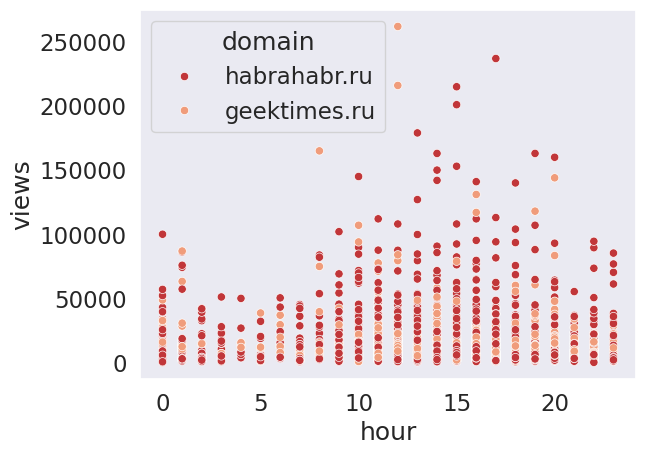

In [79]:
sns.scatterplot(x=interesting_year_month.hour, y=interesting_year_month.views, hue=interesting_year_month.domain)

<Axes: xlabel='hour', ylabel='comments'>

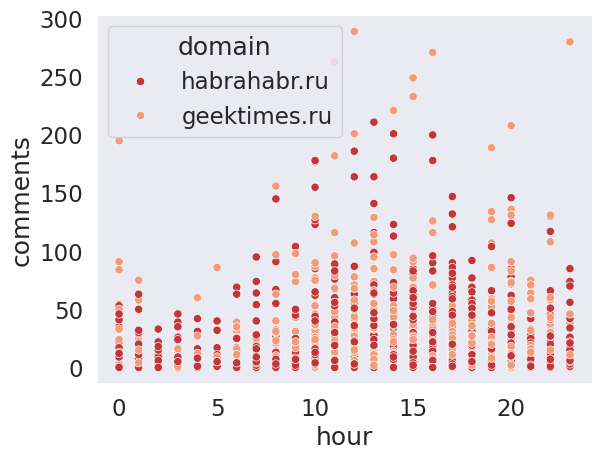

In [80]:
sns.scatterplot(x=interesting_year_month.hour, y=interesting_year_month.comments, hue=interesting_year_month.domain)

## 4\. Кого из топ-20 авторов чаще всего минусуют?

* @Mordatyj
* @Mithgol
* @alizar
* @ilya42

In [91]:
top_20 = df.sort_values(by='favs', ascending=False)[:20]
top_20.groupby(by=['author', 'votes_minus']).describe()

post_id                                              \
                           count      mean std       min       25%       50%   
author       votes_minus                                                       
@Enrey       17.0            1.0  135897.0 NaN  135897.0  135897.0  135897.0   
@SLY_G       44.0            1.0  247367.0 NaN  247367.0  247367.0  247367.0   
@Zevaka      43.0            1.0   82641.0 NaN   82641.0   82641.0   82641.0   
@alizar      14.0            1.0  117160.0 NaN  117160.0  117160.0  117160.0   
@amarao      8.0             1.0  122445.0 NaN  122445.0  122445.0  122445.0   
@amirul      16.0            1.0  106684.0 NaN  106684.0  106684.0  106684.0   
@an2kor      26.0            1.0  131581.0 NaN  131581.0  131581.0  131581.0   
@devaka      184.0           1.0  278827.0 NaN  278827.0  278827.0  278827.0   
@eucariot    4.0             1.0  134892.0 NaN  134892.0  134892.0  134892.0   
@grokru      5.0             1.0  154687.0 NaN  154687.0  154687.0  154687.0   
@hDrummer    99.0            1.0  147647.0 NaN  147647.0  147647.0  147647.0   
@kfedorov    18.0            1.0  257030.0 NaN  257030.0  257030.0  257030.0   
@nicolausYes 11.0            1.0  156241.0 NaN  156241.0  156241.0  156241.0   
@shimapa23   16.0            1.0  250621.0 NaN  250621.0  250621.0  250621.0   
             19.0            1.0  271279.0 NaN  271279.0  271279.0  271279.0   
@voff        10.0            1.0  191312.0 NaN  191312.0  191312.0  191312.0   
@vvzvlad     15.0            1.0  257592.0 NaN  257592.0  257592.0  257592.0   
@z6Dabrata   9.0             1.0  143452.0 NaN  143452.0  143452.0  143452.0   

                                             content_len           ...  \
                               75%       max       count     mean  ...   
author       votes_minus                                           ...   
@Enrey       17.0         135897.0  135897.0         1.0   7788.0  ...   
@SLY_G       44.0         247367.0  247367.0         1.0  35840.0  ...   
@Zevaka      43.0          82641.0   82641.0         1.0  13239.0  ...   
@alizar      14.0         117160.0  117160.0         1.0  12725.0  ...   
@amarao      8.0          122445.0  122445.0         1.0  25371.0  ...   
@amirul      16.0         106684.0  106684.0         1.0   9106.0  ...   
@an2kor      26.0         131581.0  131581.0         1.0  10631.0  ...   
@devaka      184.0        278827.0  278827.0         1.0   3242.0  ...   
@eucariot    4.0          134892.0  134892.0         1.0  19183.0  ...   
@grokru      5.0          154687.0  154687.0         1.0   7164.0  ...   
@hDrummer    99.0         147647.0  147647.0         1.0   5568.0  ...   
@kfedorov    18.0         257030.0  257030.0         1.0   5886.0  ...   
@nicolausYes 11.0         156241.0  156241.0         1.0  12910.0  ...   
@shimapa23   16.0         250621.0  250621.0         1.0  48133.0  ...   
             19.0         271279.0  271279.0         1.0  66055.0  ...   
@voff        10.0         191312.0  191312.0         1.0  37015.0  ...   
@vvzvlad     15.0         257592.0  257592.0         1.0  20971.0  ...   
@z6Dabrata   9.0          143452.0  143452.0         1.0  29050.0  ...   

                         dayofweek       hour                              \
                               75%  max count  mean std   min   25%   50%   
author       votes_minus                                                    
@Enrey       17.0              1.0  1.0   1.0  15.0 NaN  15.0  15.0  15.0   
@SLY_G       44.0              2.0  2.0   1.0   2.0 NaN   2.0   2.0   2.0   
@Zevaka      43.0              7.0  7.0   1.0  13.0 NaN  13.0  13.0  13.0   
@alizar      14.0              7.0  7.0   1.0   0.0 NaN   0.0   0.0   0.0   
@amarao      8.0               1.0  1.0   1.0  19.0 NaN  19.0  19.0  19.0   
@amirul      16.0              5.0  5.0   1.0  12.0 NaN  12.0  12.0  12.0   
@an2kor      26.0              6.0  6.0   1.0  20.0 NaN  20.0  20.0  20.0   
@devaka      184.0 

## 5\. Сравните субботы и понедельники

Правда ли, что по субботам авторы пишут в основном днём, а по понедельникам — в основном вечером?

<Axes: xlabel='dayofweek', ylabel='count'>

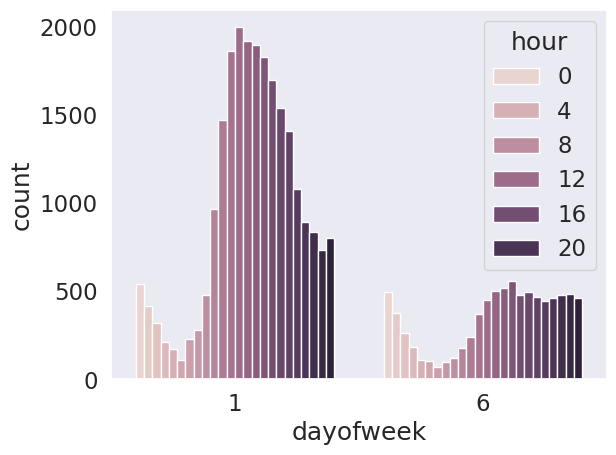

In [110]:
mon_sat = df[(df['dayofweek'] == 1) | (df['dayofweek'] == 6)]
sns.countplot(mon_sat, x=mon_sat.dayofweek, hue=mon_sat.hour)